## 🎨 잼미니의 초간단 이미지 생성 스튜디오 🚀✨  
안녕하세요! 잼미니가 여러분을 위하여 번뜩이는 아이디어를 **이미지**로 싹‑피워낼 비밀 병기를 소개할게요! 🌱🖼️  

- 잼미니 활용 가이드: https://bigbread-1129.notion.site/1d968dfea1ae8057b02fd85b94bbae35?pvs=4

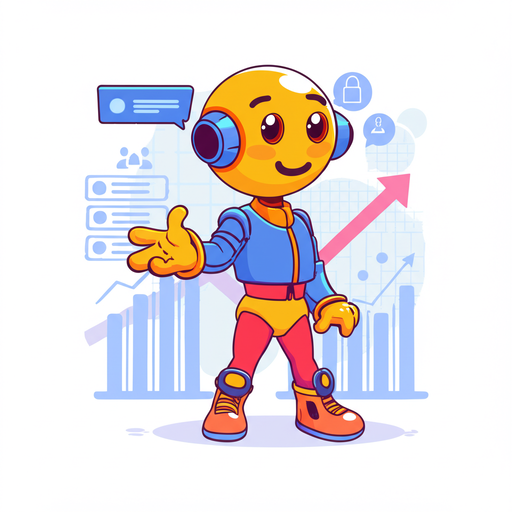

### 🛠️ 이 노트북에서은 무슨 일을 하나요?
1. **Google Generative AI 키**를 살포시 불러와서,  
   “gemini 2.0‑Flash” 이미지 모델과 딱! 연결해요. 🔑  
2. 화면에 **넓직한 프롬프트 입력창**을 띄우고,  
   “어떤 이미지를 꿈꾸시나요?” 하고 묻죠. 💭  
3. **`이미지 만들기` 버튼**을 누르면?  
   - 잼미니가 *즉시* 모델에게 주문을 넣어  
     멋진 **텍스트 & 이미지 결과**를 받아옵니다.  
   - 이미지는 자동으로 **`gemini-native-image.png`**로 저장되고,  
     노트북 안에서도 반짝! 보여드려요. ✨  
4. 새로운 아이디어가 또 떠올랐다면?  
   프롬프트 창에 다시 적고 **반복 실행**! 무한 창작 파티 시작! 🎉  

### 💡 어떻게 활용하면 좋을까요?
- **신제품 랜딩 페이지**에 들어갈 히어로 이미지를 즉석 제작!  
- MVP 피드백용 **컨셉 아트**를 순식간에 만들어서 사용자 테스트!  
- 소셜에서 바이럴을 일으킬 **밈 이미지**도 뚝딱!  


#### 🔑 Gemini API 설정하기
- API 키를 설정하고 연결을 테스트합니다
- (중복 실행 ⛔ - 한 번이면 충분해요!)

In [ ]:
from google.colab import files, userdata
from google import genai

# Google API 키 설정 부분
def setup_gemini():
    try:
        # Colab userdata에서 API 키 가져오기
        GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

        if not GOOGLE_API_KEY:
            # userdata에 없는 경우 사용자 입력 요청
            GOOGLE_API_KEY = input("Google API 키를 입력해주세요: ")
            if not GOOGLE_API_KEY:
                print("⚠️ API 키가 필요합니다")

        # 클라이언트 초기화
        global client
        client = genai.Client(api_key=GOOGLE_API_KEY)

        # 간단한 테스트로 API 연결 확인
        try:
            response = client.models.generate_content(
                model="gemini-2.0-flash",
                contents=[{
                    "role": "user",
                    "parts": [{"text": "Hello"}]
                }]
            )
            print("✅ Gemini API 연결 성공!")
        except Exception as e:
            print(f"❌ API 연결 테스트 실패: {e}")

    except Exception as e:
        print(f"❌ Gemini API 설정 실패: {e}")

#### 🔑 Gemini API 설정 확인!
- (중복 실행 ⛔ - 한 번이면 충분해요!)

In [ ]:
# 함수 호출 추가
setup_gemini()  # 이 줄이 함수를 실행합니다

✅ Gemini API 연결 성공!


#### 🔍 잼미니가 이미지를 만들기 위해서 라이브러리를 불러오고 있어요!
- (중복 실행 ⛔ - 한 번이면 충분해요!)

In [ ]:
!pip install -q deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00


#### 💫 이미지 생성을 위한 도구를 불러오는중.. (중복 실행 ⛔ - 한 번이면 충분해요!)

In [ ]:
from google import genai
from google.genai import types
from google.colab import userdata
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display
from deep_translator import GoogleTranslator

# API 키 가져오기
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

# 클라이언트 초기화
client = genai.Client(api_key=GOOGLE_API_KEY)

# 큰 텍스트 영역 생성
text_area = widgets.Textarea(
    placeholder='어떤 이미지를 만들고 싶은지 한글로 설명해주세요...',
    description='프롬프트:',
    disabled=False,
    rows=6,
    layout=widgets.Layout(width='100%', height='150px')
)

# 제출 버튼 생성
submit_button = widgets.Button(
    description='이미지 만들기',
    button_style='primary',
    tooltip='이미지를 생성합니다',
    icon='paint-brush'
)

# 결과 출력을 위한 영역
output = widgets.Output()

# 버튼 클릭시 실행할 함수
def on_button_clicked(b):
    with output:
        output.clear_output()
        korean_prompt = text_area.value

        if korean_prompt.strip():
            print("한글 프롬프트를 영어로 번역 중...")
            try:
                # deep-translator 라이브러리를 사용하여 한글 프롬프트를 영어로 번역
                translator = GoogleTranslator(source='ko', target='en')
                english_prompt = translator.translate(korean_prompt)
                print(f"번역된 영어 프롬프트: {english_prompt}")

                print("\n이미지를 생성하고 있습니다...")
                response = client.models.generate_content(
                    model="gemini-2.0-flash-exp-image-generation",
                    contents=english_prompt,
                    config=types.GenerateContentConfig(
                        response_modalities=['Text', 'Image']
                    )
                )

                for part in response.candidates[0].content.parts:
                    if part.text is not None:
                        print(f"텍스트 응답: {part.text}")
                    elif part.inline_data is not None:
                        image = Image.open(BytesIO((part.inline_data.data)))
                        image.save('gemini-native-image.png')
                        print("\n이미지가 생성되었습니다. 'gemini-native-image.png'로 저장했습니다.")
                        display(image)
                        print("\n다른 이미지를 만들려면 새 프롬프트를 입력하세요.")
            except Exception as e:
                print(f"오류가 발생했습니다: {e}")
        else:
            print("프롬프트를 입력해주세요.")

#### 자 이제 이미지를 한번 만들어볼까요? 😉

In [ ]:
# 대화 시작
print("원하는 이미지에 대한 설명을 한글로 적어주세요.")
print("="*50)

# 버튼 클릭 이벤트에 함수 연결
submit_button.on_click(on_button_clicked)

# 위젯 표시
display(text_area)
display(submit_button)
display(output)

원하는 이미지에 대한 설명을 한글로 적어주세요.


Textarea(value='', description='프롬프트:', layout=Layout(height='150px', width='100%'), placeholder='어떤 이미지를 만들고 …

Button(button_style='primary', description='이미지 만들기', icon='paint-brush', style=ButtonStyle(), tooltip='이미지를 생…

Output()

- ex) Prompt: 야구경기가 진행되는 야구장의 모습을 그려줘

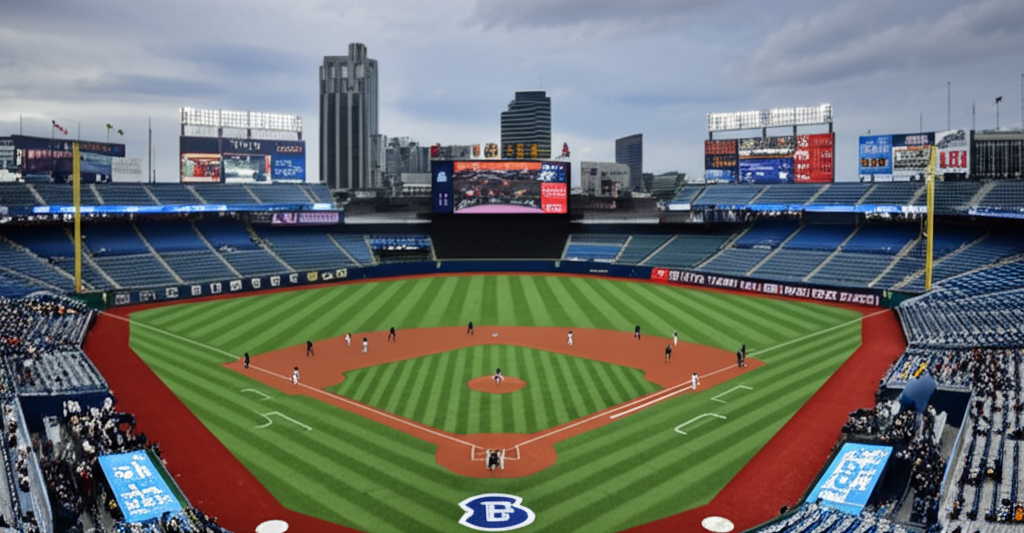


---
- This Colab Notebook developed by. Daehyun Kim (Organizer)
- **ⓒ 2025 Build with AI: GDG Campus KR StartUP Lab.**
- **ⓒ GDG Campus Korea**